<a href="https://colab.research.google.com/github/Prateek-Bhatt/Personal-Projects/blob/main/Gold_Price_Prediction_using_Random_Forest_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Lubraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Importing the dataset

In [4]:
dataset = pd.read_csv('/content/gld_price_data.csv')


Data Preprocessing

In [5]:
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
dataset.shape

(2290, 6)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [11]:
correlation = dataset.corr()

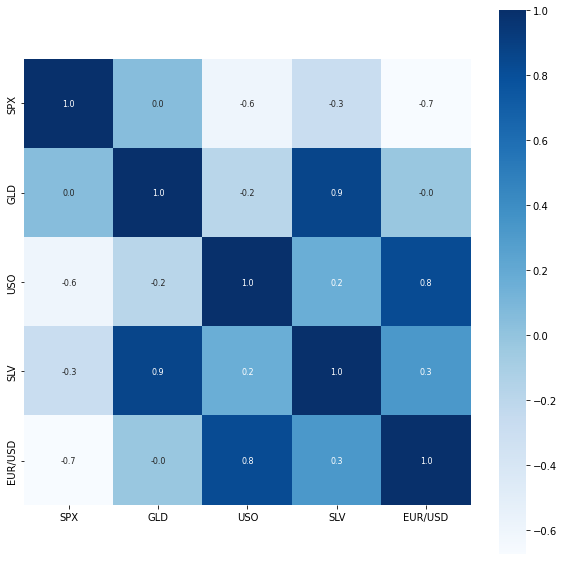

In [15]:
plt.figure(figsize = (10, 10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size': 8}, cmap = 'Blues')

In [16]:
# correlation values
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


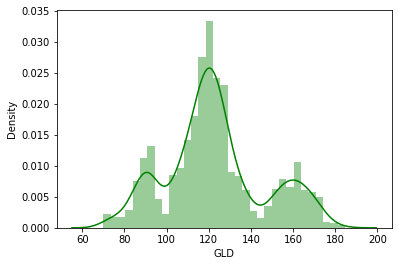

In [17]:
# checking the distribution of gold price
sns.distplot(dataset['GLD'], color = 'g')

Splitting the features and the target

In [18]:
X = dataset.drop(columns = ['Date', 'GLD'], axis = 1).values
y = dataset['GLD'].values

In [19]:
print(X)

[[1.44716003e+03 7.84700010e+01 1.51800000e+01 1.47169200e+00]
 [1.44716003e+03 7.83700030e+01 1.52850000e+01 1.47449100e+00]
 [1.41163000e+03 7.73099980e+01 1.51670000e+01 1.47549200e+00]
 ...
 [2.72307007e+03 1.44100000e+01 1.57400000e+01 1.19175300e+00]
 [2.73012988e+03 1.43800000e+01 1.55600000e+01 1.19311800e+00]
 [2.72578003e+03 1.44058000e+01 1.54542000e+01 1.18203300e+00]]


In [20]:
print(y)

[ 84.860001  85.57      85.129997 ... 125.18     124.489998 122.5438  ]


Splitting the data into training and testing data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size = 0.2, random_state = 42)

In [22]:
print(X_train.shape, X_test.shape, X.shape)

(1832, 4) (458, 4) (2290, 4)


Training the Random Forest regression model on the dataset

In [23]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
y_pred = regressor.predict(X_test)

Accuracy Score

In [28]:
r2 = metrics.r2_score(y_pred, y_test)
print(r2)

0.9897176021707792


Comparing the actual and predicted values

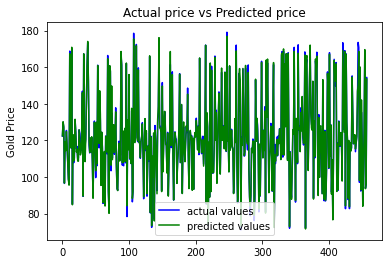

In [32]:
plt.plot(y_test, color = 'b', label = 'actual values')
plt.plot(y_pred, color = 'g', label = 'predicted values')
plt.title('Actual price vs Predicted price')
plt.ylabel('Gold Price')
plt.legend()
plt.show()